# Ada Gjermundsen
# areacella * sftlf = landarea
# NB! Lurt å endre koordinaten til lat og lon i CLM-data til CAM, feks

area = xr.open_dataset("/datapeak/NS9034K/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/fx/areacella/gn/latest/areacella_fx_NorESM2-LM_piControl_r1i1p1f1_gn.nc")
area = guf.consistent_naming(area)
area = area.areacella


lndfrc = xr.open_dataset("/datapeak/NS9034K/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/fx/sftlf/gn/latest/sftlf_fx_NorESM2-LM_piControl_r1i1p1f1_gn.nc")
lndfrc = guf.consistent_naming(lndfrc)
lndarea = 1e-2*lndfrc.sftlf*area

In [1]:
import xarray as xr
import numpy as np
import glob2 as glob
import functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/land_vars/'
ds_piClim = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.clm2.concatfiles.nc')
ds_0_5xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_0_5xCO2_20250529.clm2.concatfiles.nc')
ds_2xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.clm2.concatfiles.nc')
ds_4xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.clm2.concatfiles.nc')

In [ ]:
# Fix time stamp
ds_piClim = functions.fix_clm_time(ds_piClim)
ds_2xCO2 = functions.fix_clm_time(ds_2xCO2)
ds_4xCO2 = functions.fix_clm_time(ds_4xCO2)
ds_0_5xCO2 = functions.fix_clm_time(ds_0_5xCO2)
print(ds_0_5xCO2.data_vars)

Data variables:
    time_bounds     (time, hist_interval) object 29kB ...
    area            (lat, lon) float64 111kB ...
    QSOIL           (time, lat, lon) float64 199MB ...
    SOILWATER_10CM  (time, lat, lon) float64 199MB ...
    TOTSOILICE      (time, lat, lon) float64 199MB ...
    TOTSOILLIQ      (time, lat, lon) float64 199MB ...
    QFLX_EVAP_TOT   (time, lat, lon) float64 199MB ...
    QH2OSFC         (time, lat, lon) float64 199MB ...
    RAIN_FROM_ATM   (time, lat, lon) float64 199MB ...


In [ ]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.clm2.concatfiles.nc')
ds_0_5xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_0_5xCO2_20250529.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.clm2.concatfiles.nc')

In [7]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)
print(ds_piClim_xtra.data_vars)

Data variables:
    time_bounds     (time, hist_interval) object 29kB ...
    area            (lat, lon) float64 111kB ...
    QSOIL           (time, lat, lon) float64 199MB ...
    SOILWATER_10CM  (time, lat, lon) float64 199MB ...
    TOTSOILICE      (time, lat, lon) float64 199MB ...
    TOTSOILLIQ      (time, lat, lon) float64 199MB ...


In [2]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/land_vars/'
ds_piClim = xr.open_dataset(rpath+'all_land_vars_piClim.nc')
ds_2xCO2 = xr.open_dataset(rpath+'all_land_vars_2xCO2.nc')
ds_4xCO2 = xr.open_dataset(rpath+'all_land_vars_4xCO2.nc')

In [3]:
ds_piClim['SOILWATER_10CM']

<xarray.DataArray 'SOILWATER_10CM' (time: 1800, lat: 96, lon: 144)> Size: 199MB
[24883200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * time     (time) object 14kB 1920-01-15 00:00:00 ... 2069-12-15 00:00:00
Attributes:
    long_name:     soil liquid water + ice in top 10cm of soil (veg landunits...
    units:         kg/m2
    cell_methods:  time: mean

In [4]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['QFLX_EVAP_PLANTS'] = ds['QVEGE'] + ds['QVEGT']
    ds['QFLX_EVAP_TOT_calc'] = ds['QSOIL'] + ds['QVEGE'] + ds['QVEGT']
    ds['QFLX_EVAP_diff_calc'] = ds['QFLX_EVAP_TOT'] - ds['QFLX_EVAP_TOT_calc']

In [3]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.snow.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.snow.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.snow.clm2.concatfiles.nc')

In [4]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [5]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['SNOW_FROM_ATM'] = ds_xtra['SNOW_FROM_ATM']

In [6]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['PRECIP_TOTAL'] = ds['SNOW_FROM_ATM']+ds['RAIN_FROM_ATM']

In [9]:
ds_piClim

<xarray.Dataset> Size: 4GB
Dimensions:              (time: 1800, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * lon                  (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                  (lat) float64 768B -90.0 -88.11 -86.21 ... 88.11 90.0
  * time                 (time) object 14kB 1920-01-15 00:00:00 ... 2069-12-1...
Dimensions without coordinates: hist_interval
Data variables: (12/20)
    time_bounds          (time, hist_interval) object 29kB ...
    area                 (lat, lon) float64 111kB ...
    QSOIL                (time, lat, lon) float64 199MB ...
    SOILWATER_10CM       (time, lat, lon) float64 199MB ...
    TOTSOILICE           (time, lat, lon) float64 199MB ...
    TOTSOILLIQ           (time, lat, lon) float64 199MB ...
    ...                   ...
    TWS                  (time, lat, lon) float64 199MB ...
    QFLX_EVAP_PLANTS     (time, lat, lon) float64 199MB 0.0 0.0 0.0 ... nan nan
    QFLX_EVAP_TOT_calc   (time, lat, lon) float64 199MB -4.236e-08 ... nan
    QFLX_EVAP_diff_calc  (time, lat, lon) float64 199MB 0.0 0.0 0.0 ... nan nan
    SNOW_FROM_ATM        (time, lat, lon) float64 199MB ...
    PRECIP_TOTAL         (time, lat, lon) float64 199MB 1.952e-06 ... nan
Attributes: (12/101)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   Fri Sep 12 11:07:27 2025: ncrc...
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    ...                                        ...
    cft_tropical_corn:                         61
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1
    NCO:                                       netCDF Operators version 5.0.7...

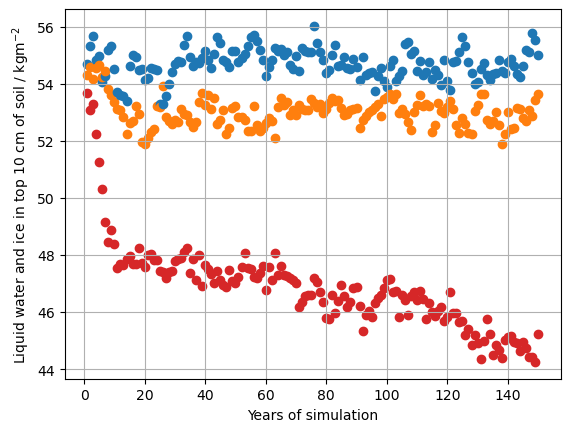

In [5]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
Arctic_2xCO2 = ds_2xCO2[var].sel(lat=slice(Arctic_lim,90))
Arctic_4xCO2 = ds_4xCO2[var].sel(lat=slice(Arctic_lim,90))

annual_piClim = piClim_Arctic.groupby('time.year').mean('time')
annual_2xCO2 = Arctic_2xCO2.groupby('time.year').mean('time')
annual_4xCO2 = Arctic_4xCO2.groupby('time.year').mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (annual_2xCO2.isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (annual_4xCO2.isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.show()

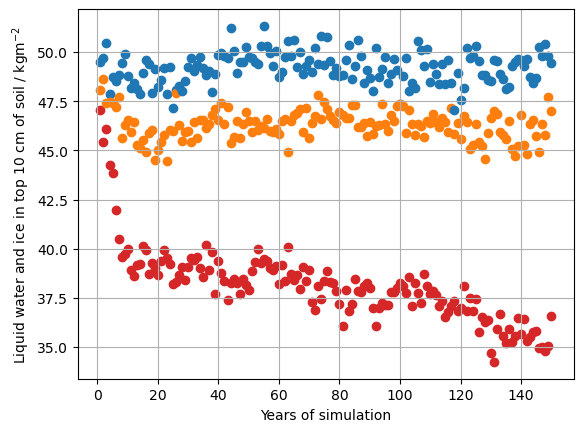

In [86]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.show()

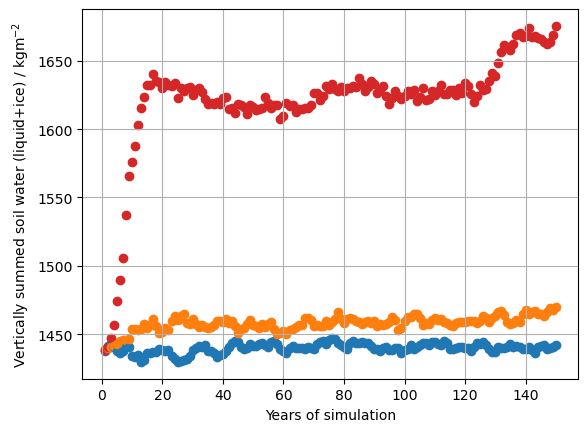

In [53]:
Arctic_lim = 60
var = 'TOTSOILLIQ'
# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))

# Annual average
ds_piClim_i = ds_piClim_i.groupby('time.year').mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby('time.year').mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby('time.year').mean('time')


import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i['TOTSOILLIQ'].isel(year=i)*area_weights).sum() + (ds_piClim_i['TOTSOILICE'].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i['TOTSOILLIQ'].isel(year=i)*area_weights).sum() + (ds_2xCO2_i['TOTSOILICE'].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i['TOTSOILLIQ'].isel(year=i)*area_weights).sum() + (ds_4xCO2_i['TOTSOILICE'].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil water (liquid+ice) / kgm$^{-2}$')
plt.show()

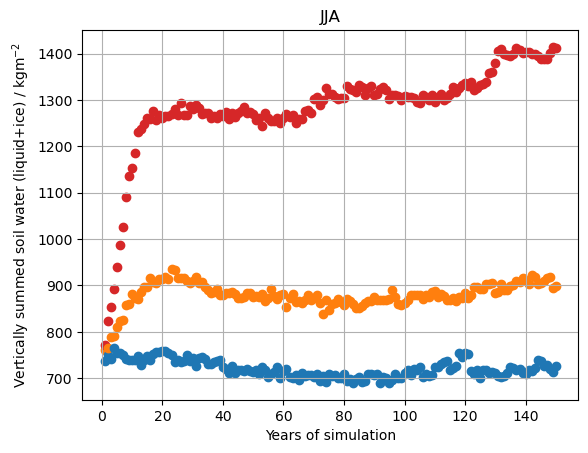

In [ ]:
# Make a spatial average
Arctic_lim = 60
var = 'TOTSOILLIQ'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil liquid water/ kgm$^{-2}$')
plt.title(season)
plt.show()

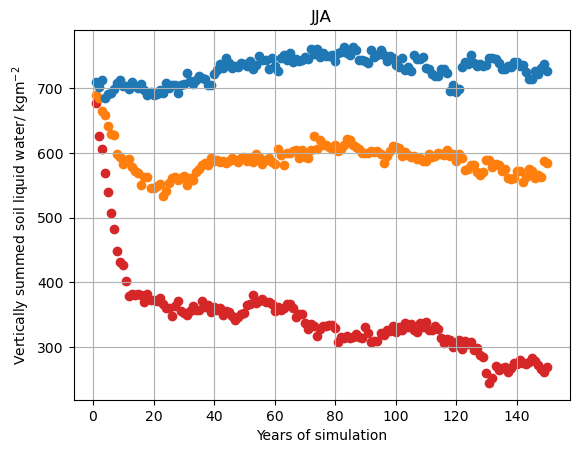

In [62]:
# Make a spatial average
Arctic_lim = 60
var = 'TOTSOILICE'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil ice/ kgm$^{-2}$')
plt.title(season)
plt.show()

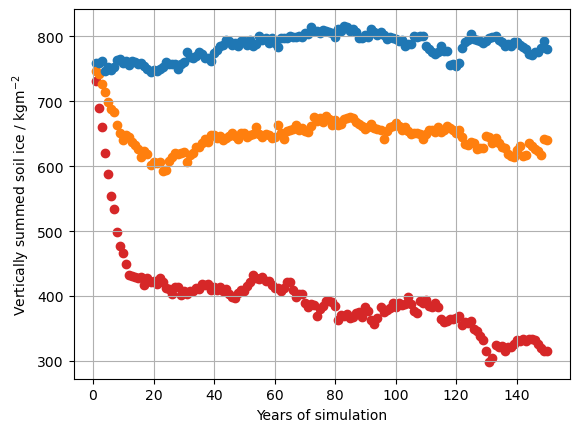

In [45]:
Arctic_lim = 60
var = 'TOTSOILICE'
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
Arctic_2xCO2 = ds_2xCO2[var].sel(lat=slice(Arctic_lim,90))
Arctic_4xCO2 = ds_4xCO2[var].sel(lat=slice(Arctic_lim,90))

annual_piClim = piClim_Arctic.groupby('time.year').mean('time')
annual_2xCO2 = Arctic_2xCO2.groupby('time.year').mean('time')
annual_4xCO2 = Arctic_4xCO2.groupby('time.year').mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (annual_2xCO2.isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (annual_4xCO2.isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Vertically summed soil ice / kgm$^{-2}$')
plt.show()

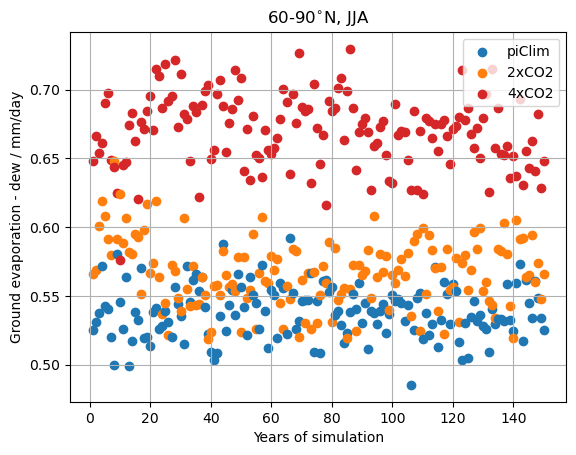

In [29]:
# Make a spatial average
Arctic_lim = 60
var = 'QSOIL'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Ground evaporation - dew / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

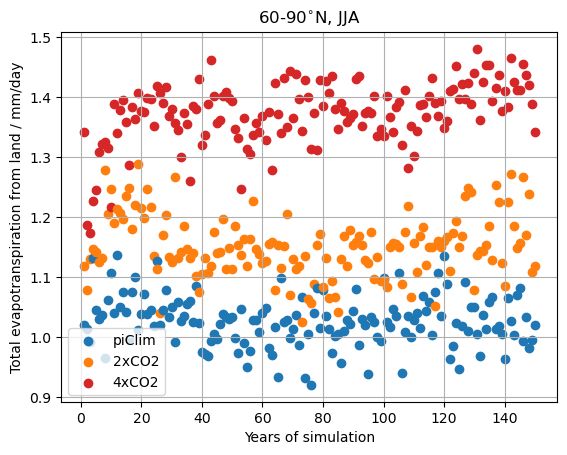

In [28]:
# Make a spatial average
Arctic_lim = 60
var = 'QFLX_EVAP_TOT'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Total evapotranspiration from land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

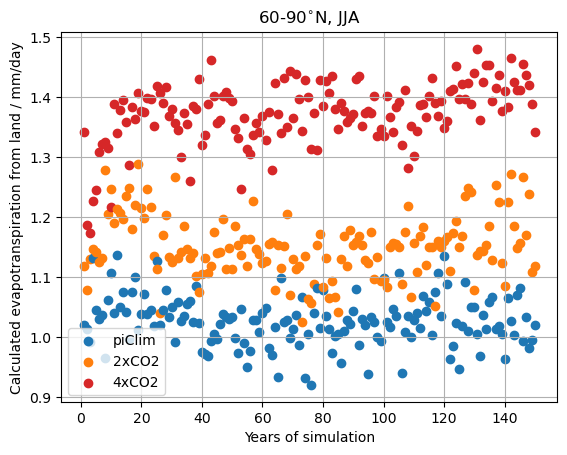

In [32]:
# Make a spatial average
Arctic_lim = 60
var = 'QFLX_EVAP_TOT_calc'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Calculated evapotranspiration from land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

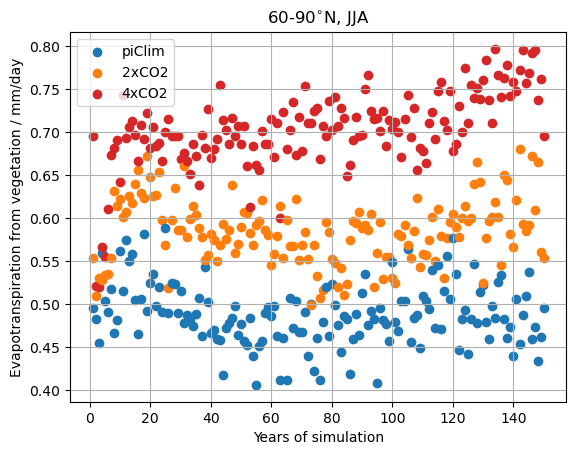

In [33]:
# Make a spatial average
Arctic_lim = 60
var = 'QFLX_EVAP_PLANTS'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Evapotranspiration from vegetation / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

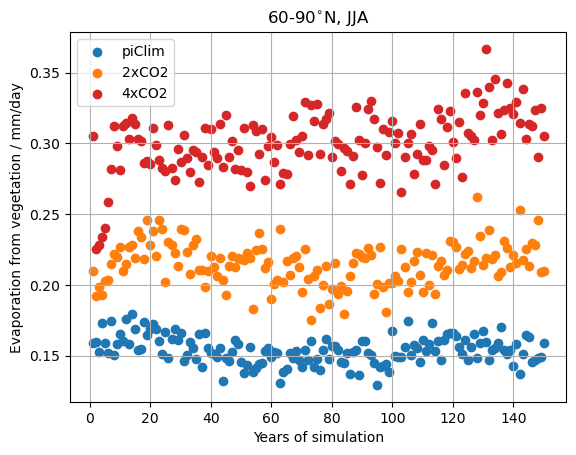

In [30]:
# Make a spatial average
Arctic_lim = 60
var = 'QVEGE'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt

plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Evaporation from vegetation / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

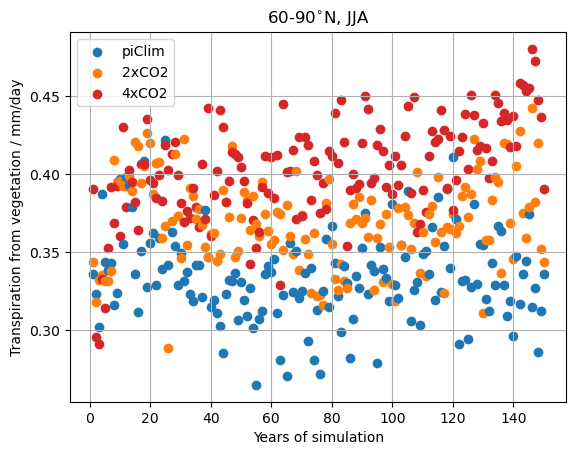

In [31]:
# Make a spatial average
Arctic_lim = 60
var = 'QVEGT'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt

plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Transpiration from vegetation / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

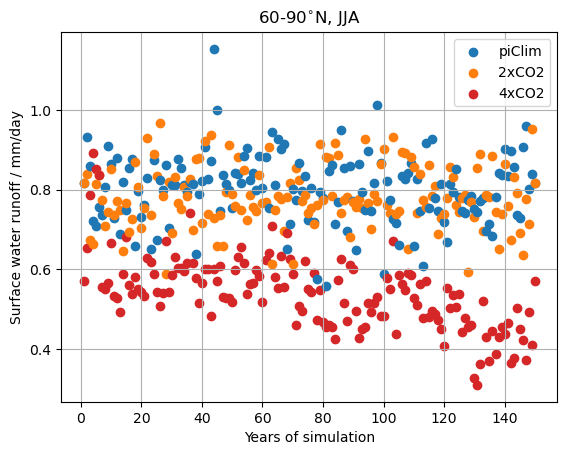

In [34]:
# Make a spatial average
Arctic_lim = 60
var = 'QH2OSFC'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Surface water runoff / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

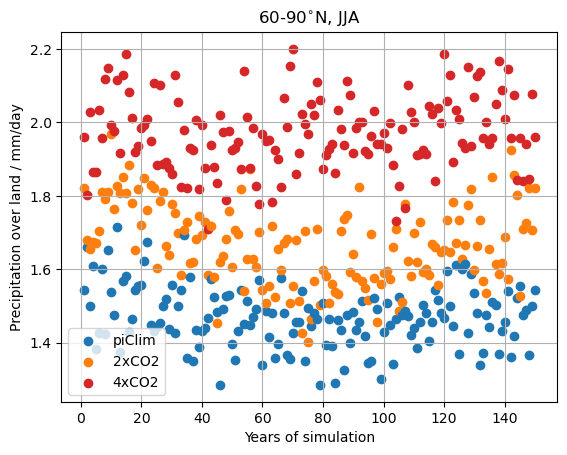

In [35]:
# Make a spatial average
Arctic_lim = 60
var = 'RAIN_FROM_ATM'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Precipitation over land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

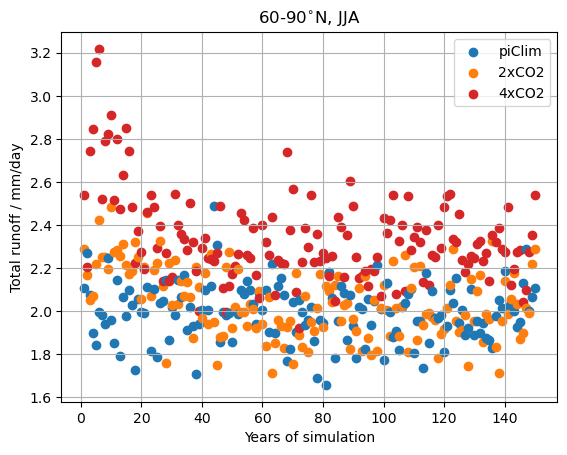

In [47]:
# Make a spatial average
Arctic_lim = 60
var = 'QRUNOFF'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Total runoff / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

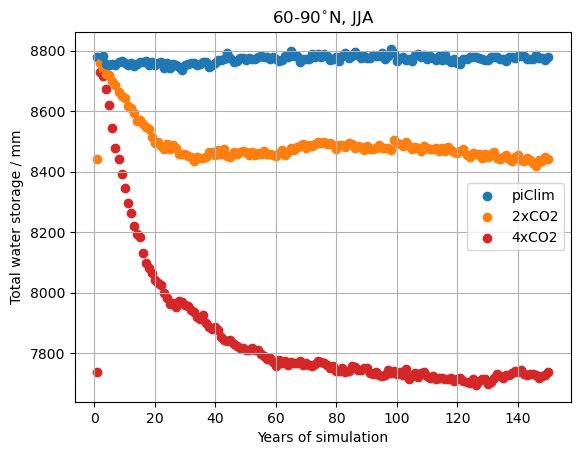

In [42]:
# Make a spatial average
Arctic_lim = 60
var = 'TWS'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Total water storage / mm')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

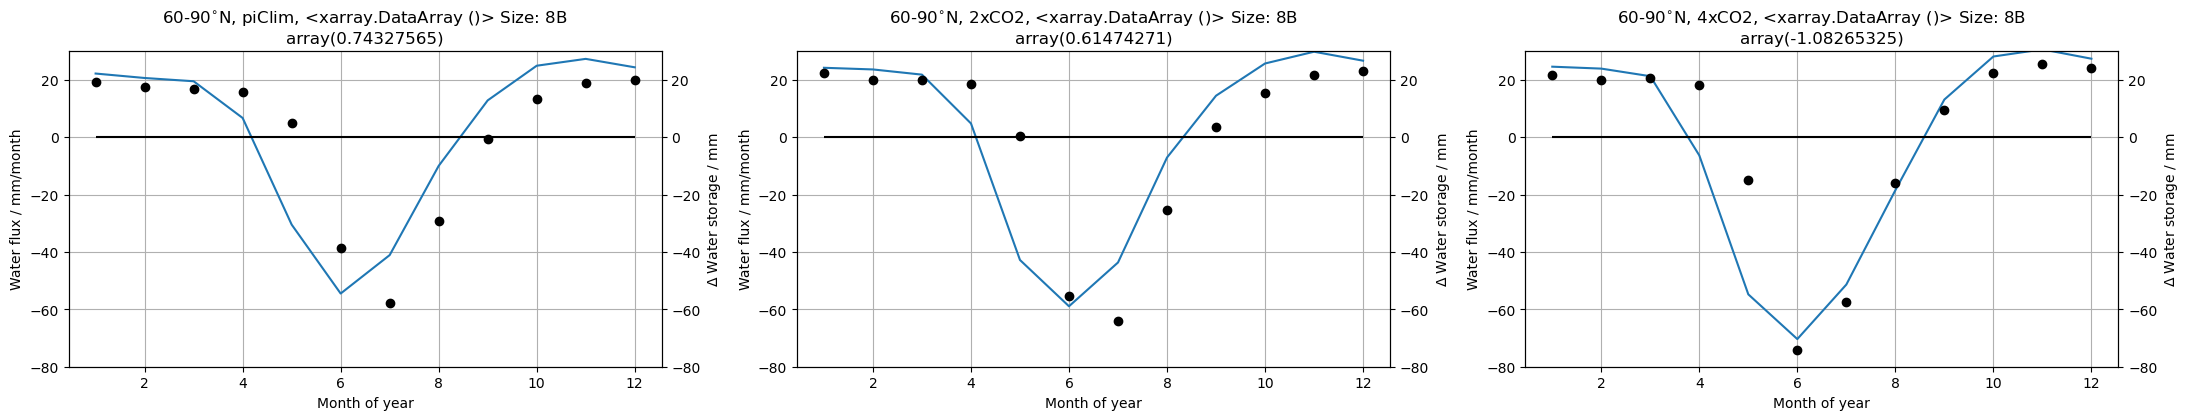

In [27]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, ((ds['PRECIP_TOTAL']-ds['QFLX_EVAP_TOT']-ds['QRUNOFF'])*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='P-ET-R',color='tab:blue')
    #ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    #ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    #ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')
    ax2.scatter(1, (ds['TWS'].isel(month=0)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=11)*area_weights).sum(dim=['lon','lat']),color='black')
    for i in range(1, len(ds.month)):    
        ax2.scatter(1+i, (ds['TWS'].isel(month=i)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=i-1)*area_weights).sum(dim=['lon','lat']), color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    balance = ((ds['PRECIP_TOTAL']-ds['QFLX_EVAP_TOT']-ds['QRUNOFF'])*area_weights).sum(dim=['lon','lat','month'])*60*60*24
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name+', '+str(balance))
    ax.set_ylim([-80,30])
    ax2.set_ylim([-80,30])
    ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 12, color='black', label='Zero $\Delta$TWS from previous month')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
#ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
#ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)

fig.tight_layout()
plt.show()

In [41]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('1920-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

for ds, name in zip(ds_list, name_list):
    print(name)
    cum_TWS_change = [0]
    for i in range(1,len(ds.month)):
        monthly_TWS_change = ((ds['TWS'].isel(month=i)-ds['TWS'].isel(month=i-1))*area_weights).sum(dim=['lon','lat'])
        cum_TWS_change.append(cum_TWS_change[i-1]+monthly_TWS_change.values)
    monthly_TWS_change = ((ds['TWS'].isel(month=0) - ds['TWS'].isel(month=11))*area_weights).sum(dim=['lon','lat'])
    cum_TWS_change.append(monthly_TWS_change.values)
    print(np.mean(cum_TWS_change))

piClim
-7.743625776307021
2xCO2
-11.986245252656571
4xCO2
-20.787760161390047


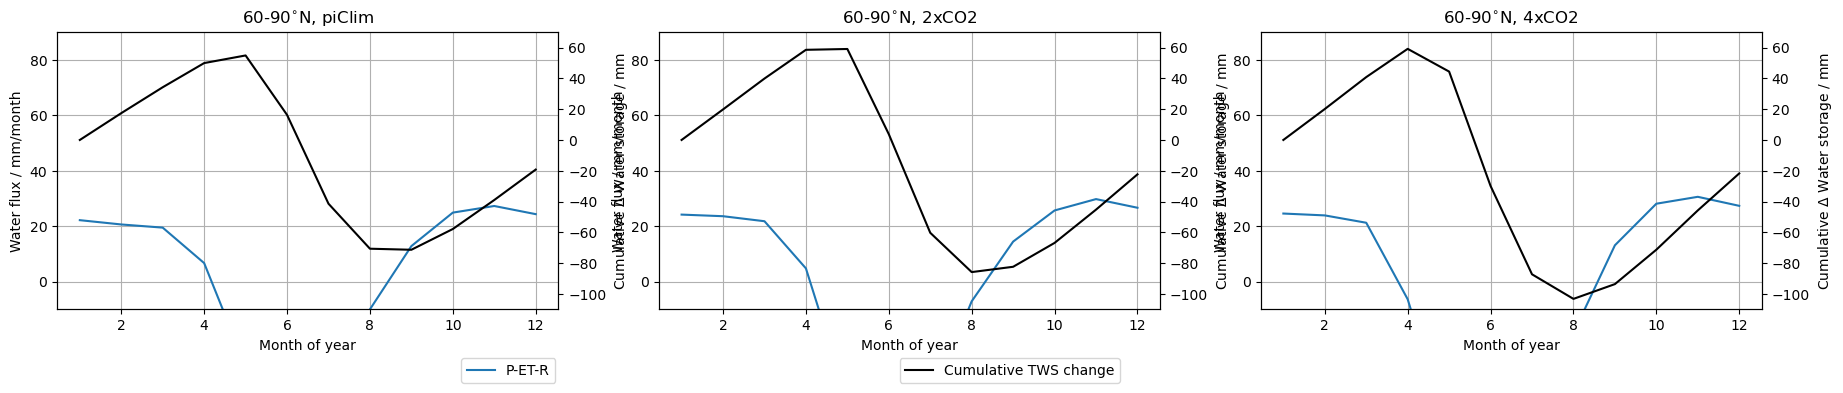

In [10]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, ((ds['PRECIP_TOTAL']-ds['QFLX_EVAP_TOT']-ds['QRUNOFF'])*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='P-ET-R',color='tab:blue')
    #ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    #ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    #ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Rain',color='tab:blue')
    #ax.plot(ds.month, (ds['SNOW_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Snow',linestyle='--',color='tab:blue')
    #ax.plot(ds.month, (ds['PRECIP_TOTAL']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')
    cum_TWS_change = [0]
    for i in range(1,len(ds.month)):
        monthly_TWS_change = (ds['TWS'].isel(month=i)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=i-1)*area_weights).sum(dim=['lon','lat'])
        cum_TWS_change.append(cum_TWS_change[i-1]+monthly_TWS_change)
    ax2.plot(ds.month, cum_TWS_change, color='black', label='Cumulative TWS change')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([-110,70])
    ax2.set_ylabel('Cumulative $\Delta$ Water storage / mm')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)

#fig.tight_layout()
plt.show()

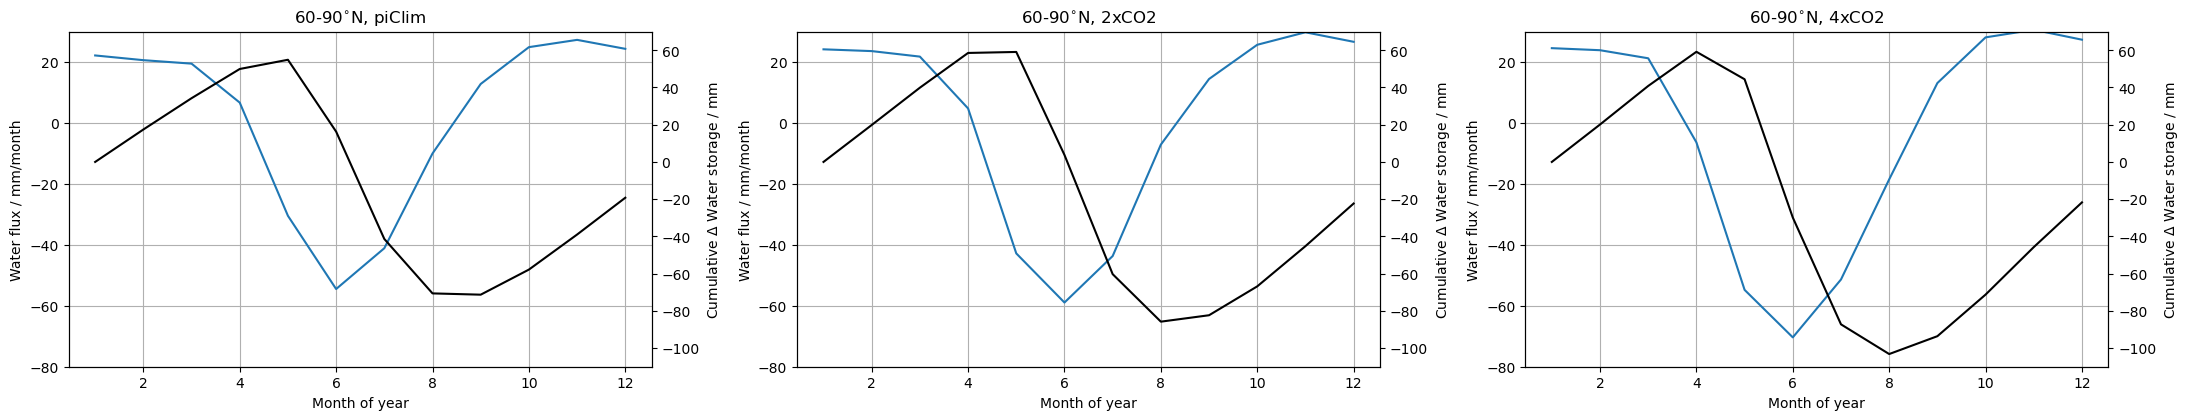

In [22]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, ((ds['PRECIP_TOTAL']-ds['QFLX_EVAP_TOT']-ds['QRUNOFF'])*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='P-ET-R',color='tab:blue')
    cum_TWS_change = [0]
    for i in range(1,len(ds.month)):
        monthly_TWS_change = (ds['TWS'].isel(month=i)*area_weights).sum(dim=['lon','lat'])-(ds['TWS'].isel(month=i-1)*area_weights).sum(dim=['lon','lat'])
        cum_TWS_change.append(cum_TWS_change[i-1]+monthly_TWS_change)
    ax2.plot(ds.month, cum_TWS_change, color='black', label='Cumulative TWS change')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-80,30])
    ax2.set_ylim([-110,70])
    ax2.set_ylabel('Cumulative $\Delta$ Water storage / mm')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
#ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
#ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)

fig.tight_layout()
plt.show()

/tmp/ipykernel_2300156/2359719368.py:46: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


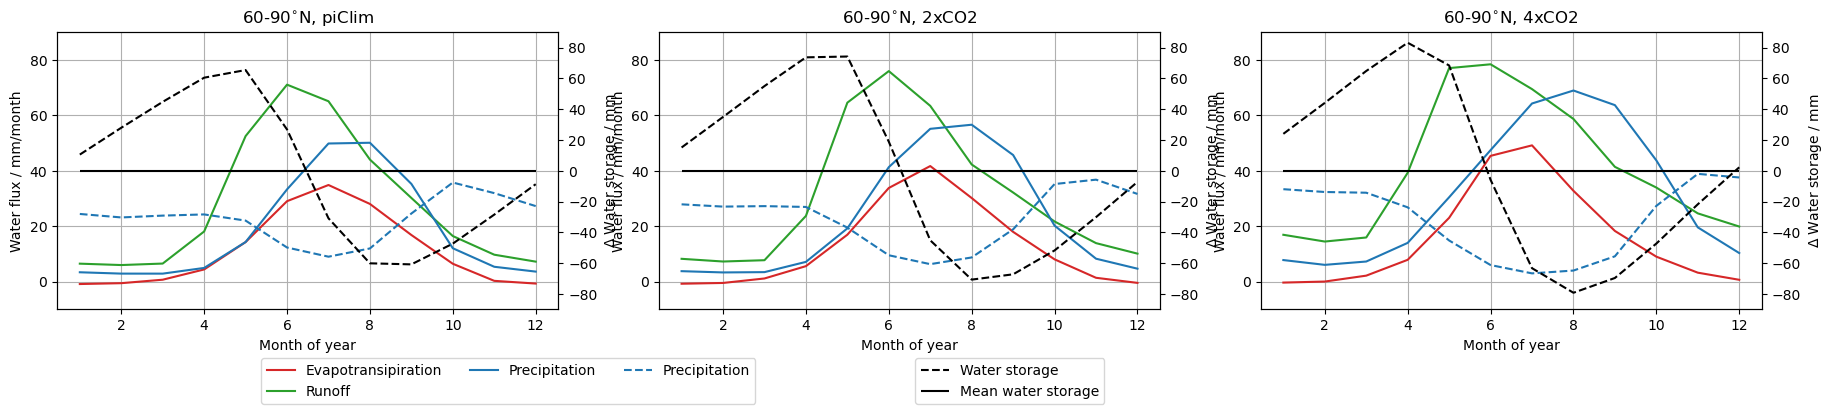

In [7]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    #ax.plot(ds.month, (ds['PRECIP_TOTAL']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')   
    ax.plot(ds.month, (ds['RAIN_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Rain',color='tab:blue')   
    ax.plot(ds.month, (ds['SNOW_FROM_ATM']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Snow',color='tab:blue', linestyle='--')       
    ax2.plot(ds.month, (ds['TWS']*area_weights).sum(dim=['lon','lat'])-(ds['TWS']*area_weights).sum(dim=['lon','lat']).mean('month'), label='Water storage', linestyle='--',color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([-90,90])
    ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 12, color='black', label='Mean water storage')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
fig.tight_layout()
plt.show()

/tmp/ipykernel_3950932/3226251494.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


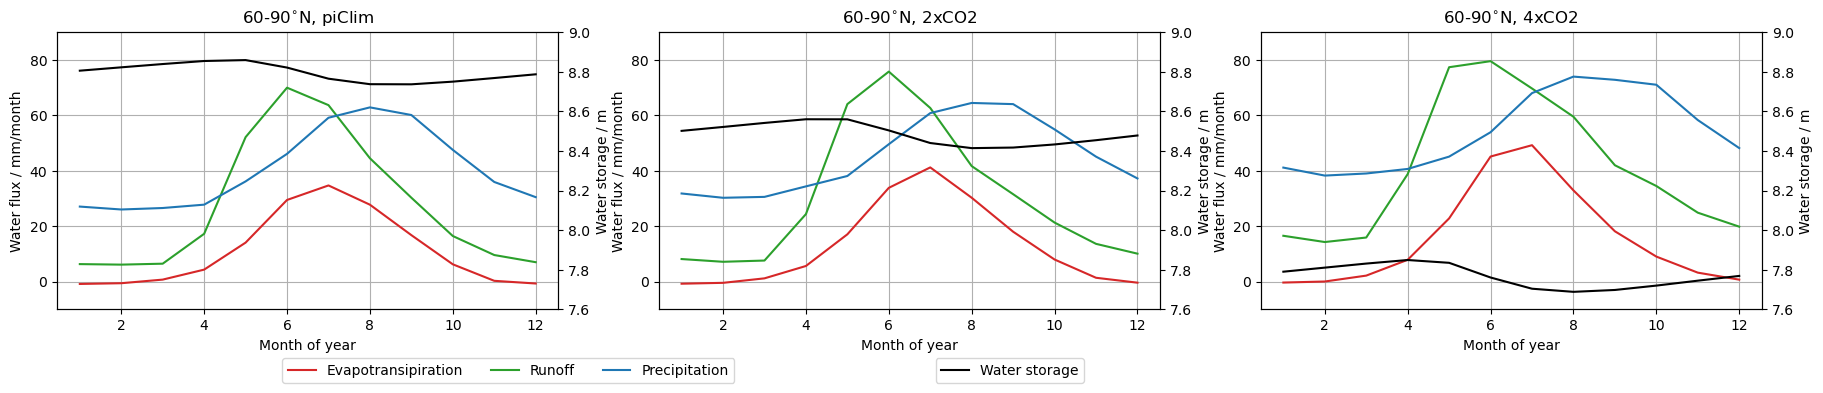

In [ ]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    ax.plot(ds.month, (ds['PRECIP_TOTAL']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')   
    ax2.plot(ds.month, (ds['TWS']*area_weights).sum(dim=['lon','lat'])/1000, label='Water storage',color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([7.6,9])
    ax2.set_ylabel('Water storage / m')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
fig.tight_layout()
plt.show()

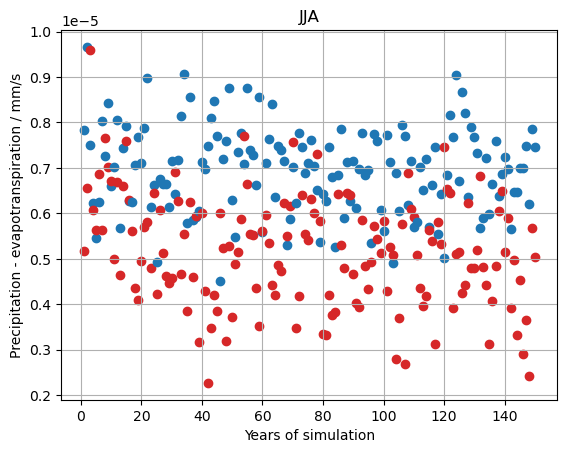

In [27]:
# HYDROLOGICAL BALANCE

# Make a spatial average
Arctic_lim = 60
season = 'JJA'

# Choose area (NB! EXCLUDING GREENLAND!)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt

for i in range(len(ds_piClim_i.year)):
  #  plt.scatter(1+i, ((ds_piClim_i['RAIN_FROM_ATM'].isel(year=i) - ds_piClim_i['QH2OSFC'].isel(year=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:blue')
  #  plt.scatter(1+i, ((ds_4xCO2_i['RAIN_FROM_ATM'].isel(year=i) - ds_4xCO2_i['QH2OSFC'].isel(year=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:red')
    plt.scatter(1+i, ((ds_piClim_i['PRECIP_TOTAL'].isel(year=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, ((ds_4xCO2_i['PRECIP_TOTAL'].isel(year=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(year=i))*area_weights).sum(), color='tab:red')

plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Precipitation - evapotranspiration / mm/s')
plt.title(season)
plt.show()

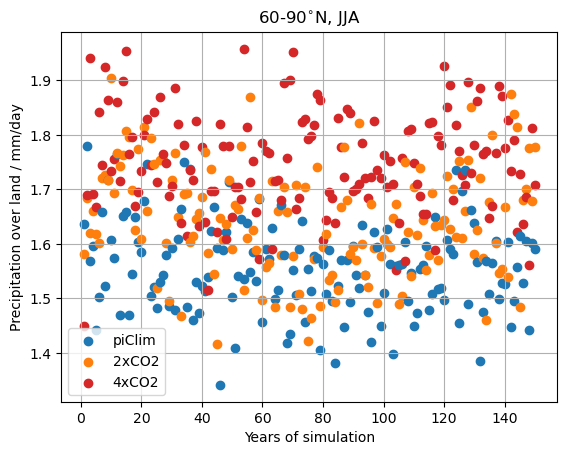

In [19]:
# Make a spatial average
Arctic_lim = 60
var = 'PRECIP_TOTAL'
season = 'JJA'

# Choose area (NB! EXCLUDING GREENLAND!)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=slice(0,290))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
plt.scatter(1, (ds_piClim_i[var].isel(year=0)*area_weights).sum()*60*60*24, color='tab:blue', label='piClim')
plt.scatter(1, (ds_2xCO2_i[var].isel(year=0)*area_weights).sum()*60*60*24, color='tab:orange', label='2xCO2')
plt.scatter(1, (ds_4xCO2_i[var].isel(year=0)*area_weights).sum()*60*60*24, color='tab:red', label='4xCO2')

for i in range(1, len(ds_piClim_i.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum()*60*60*24, color='tab:red')
plt.grid()
plt.legend()
plt.xlabel('Years of simulation')
plt.ylabel('Precipitation over land / mm/day')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()

Text(0.5, 0, 'kg/m$^2$')

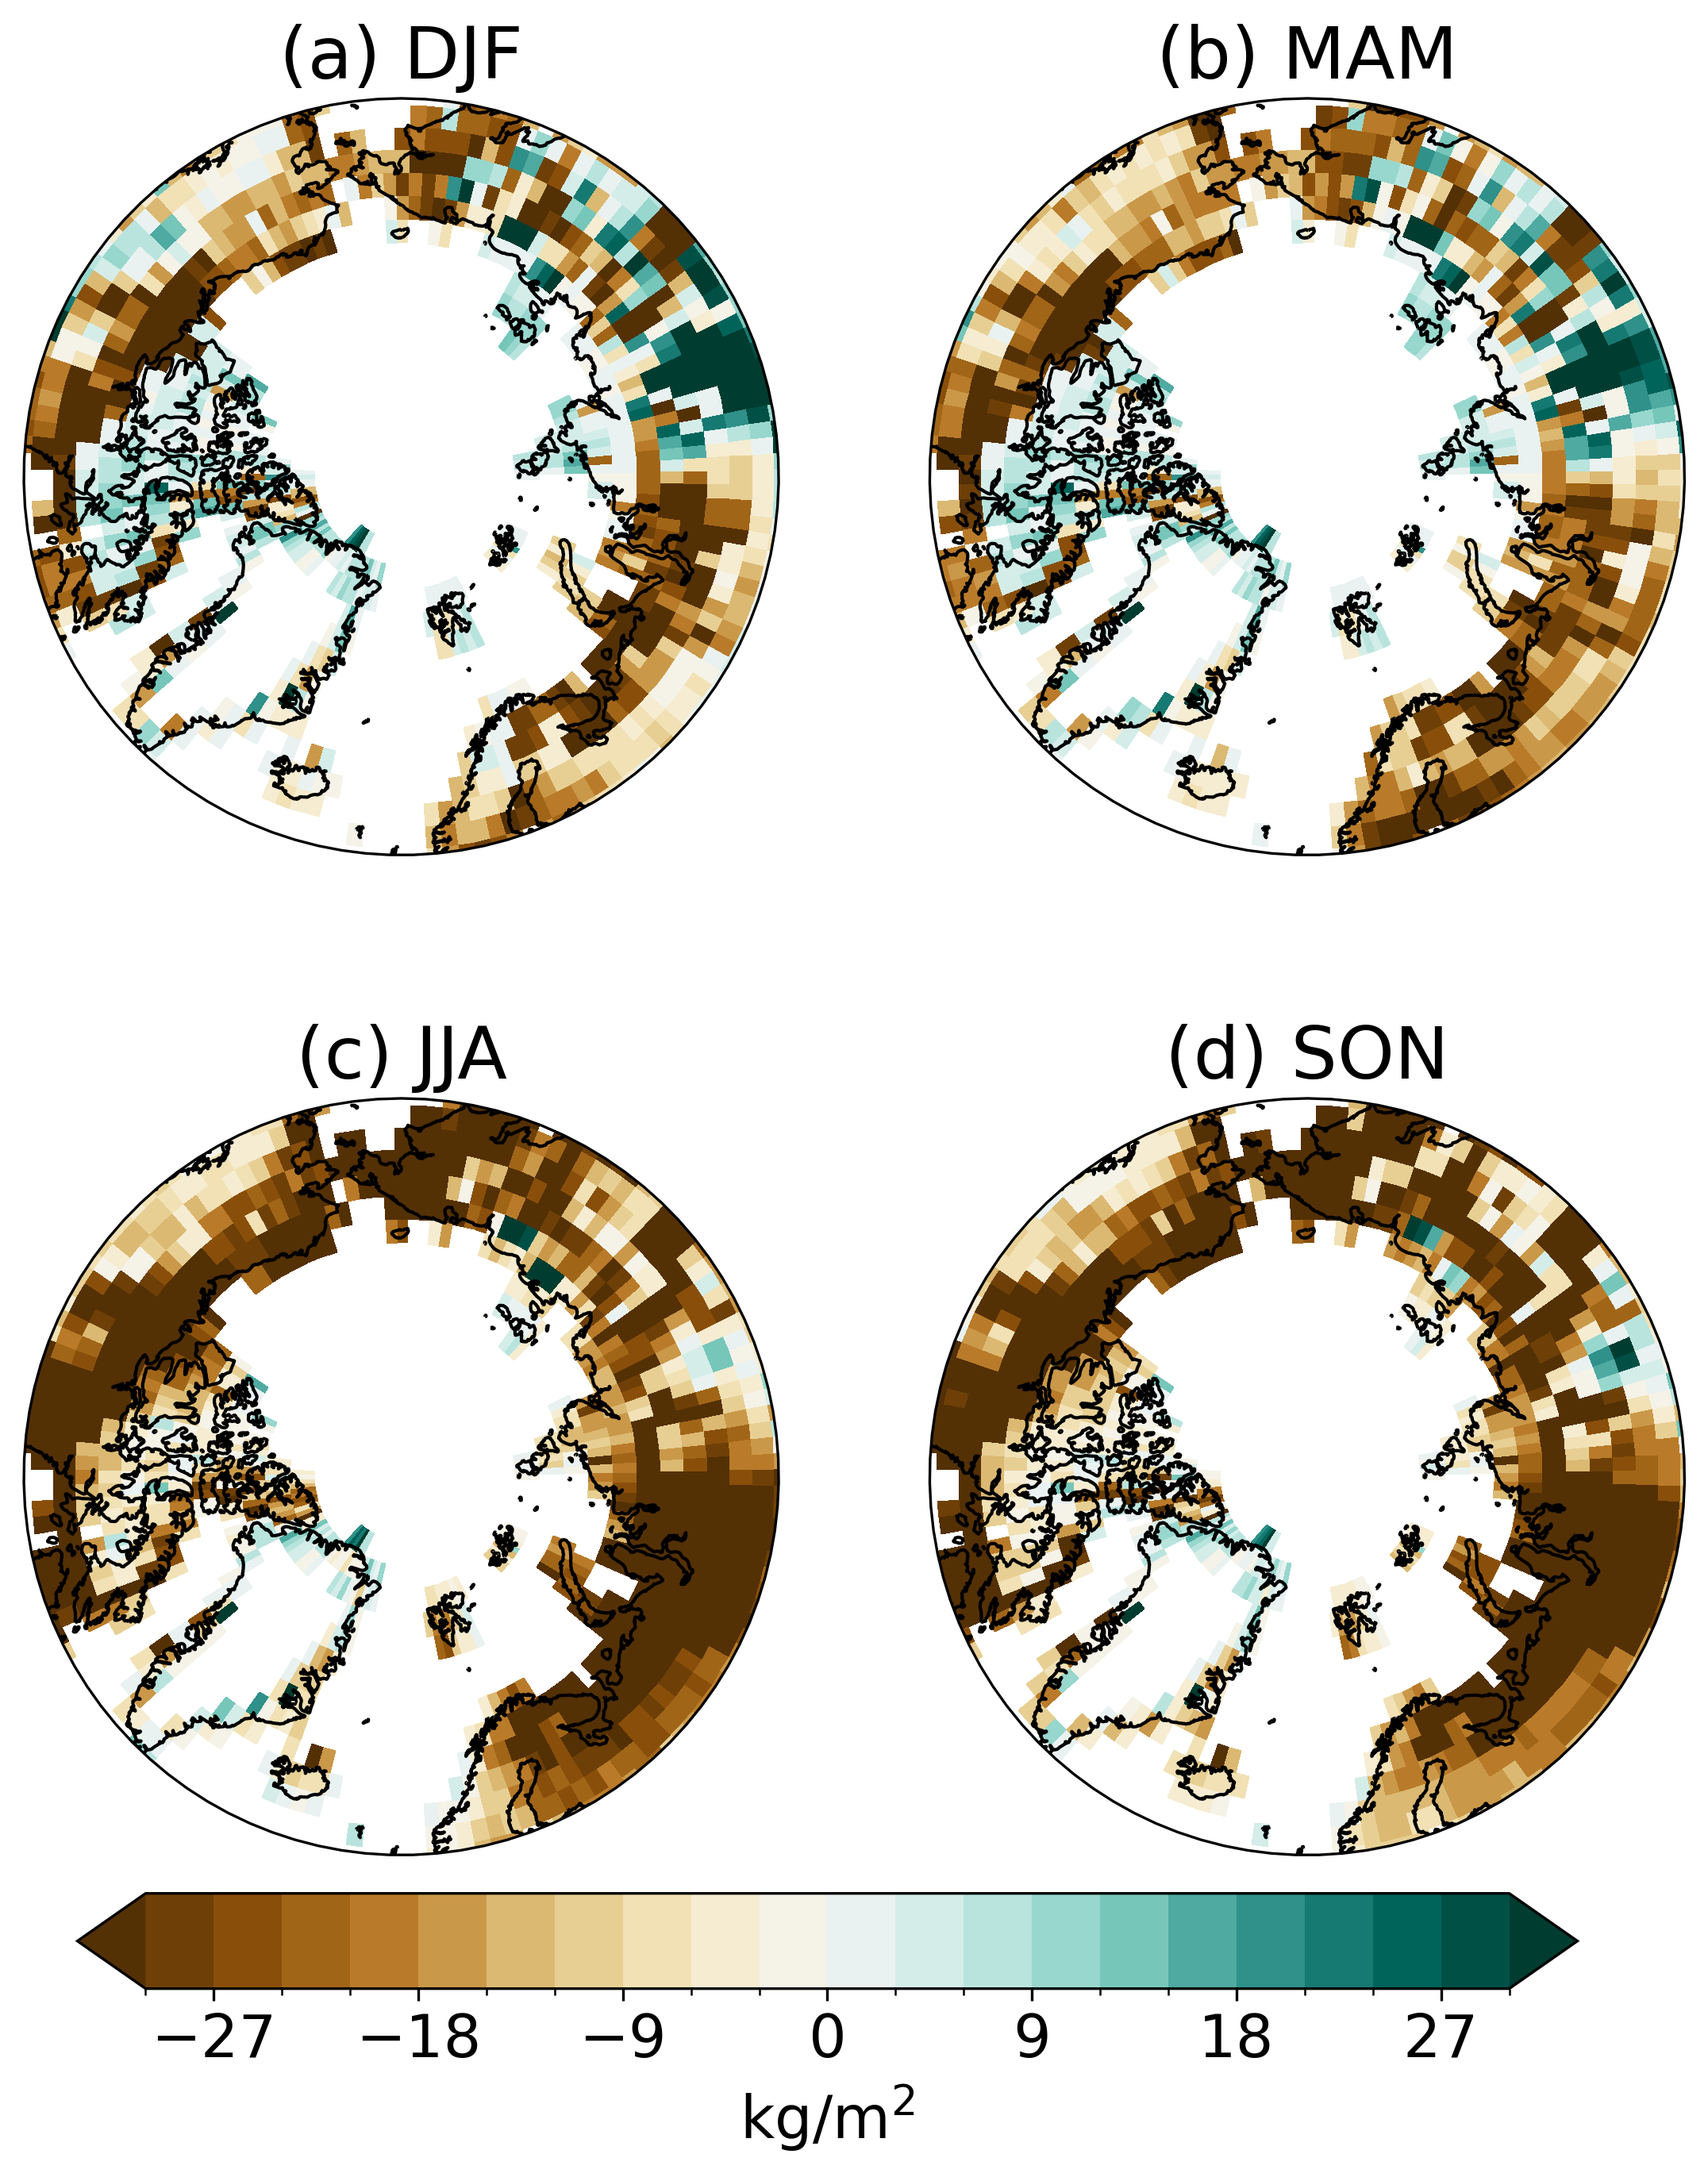

In [37]:
var = 'SOILWATER_10CM'
lim = 30
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season) - piClim_s[var].sel(season=season)
    data = data/piClim_s[var].sel(season=season)*100
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('kg/m$^2$', fontsize=18)

Text(0.5, 0, 'Soil moisture, kg/m2')

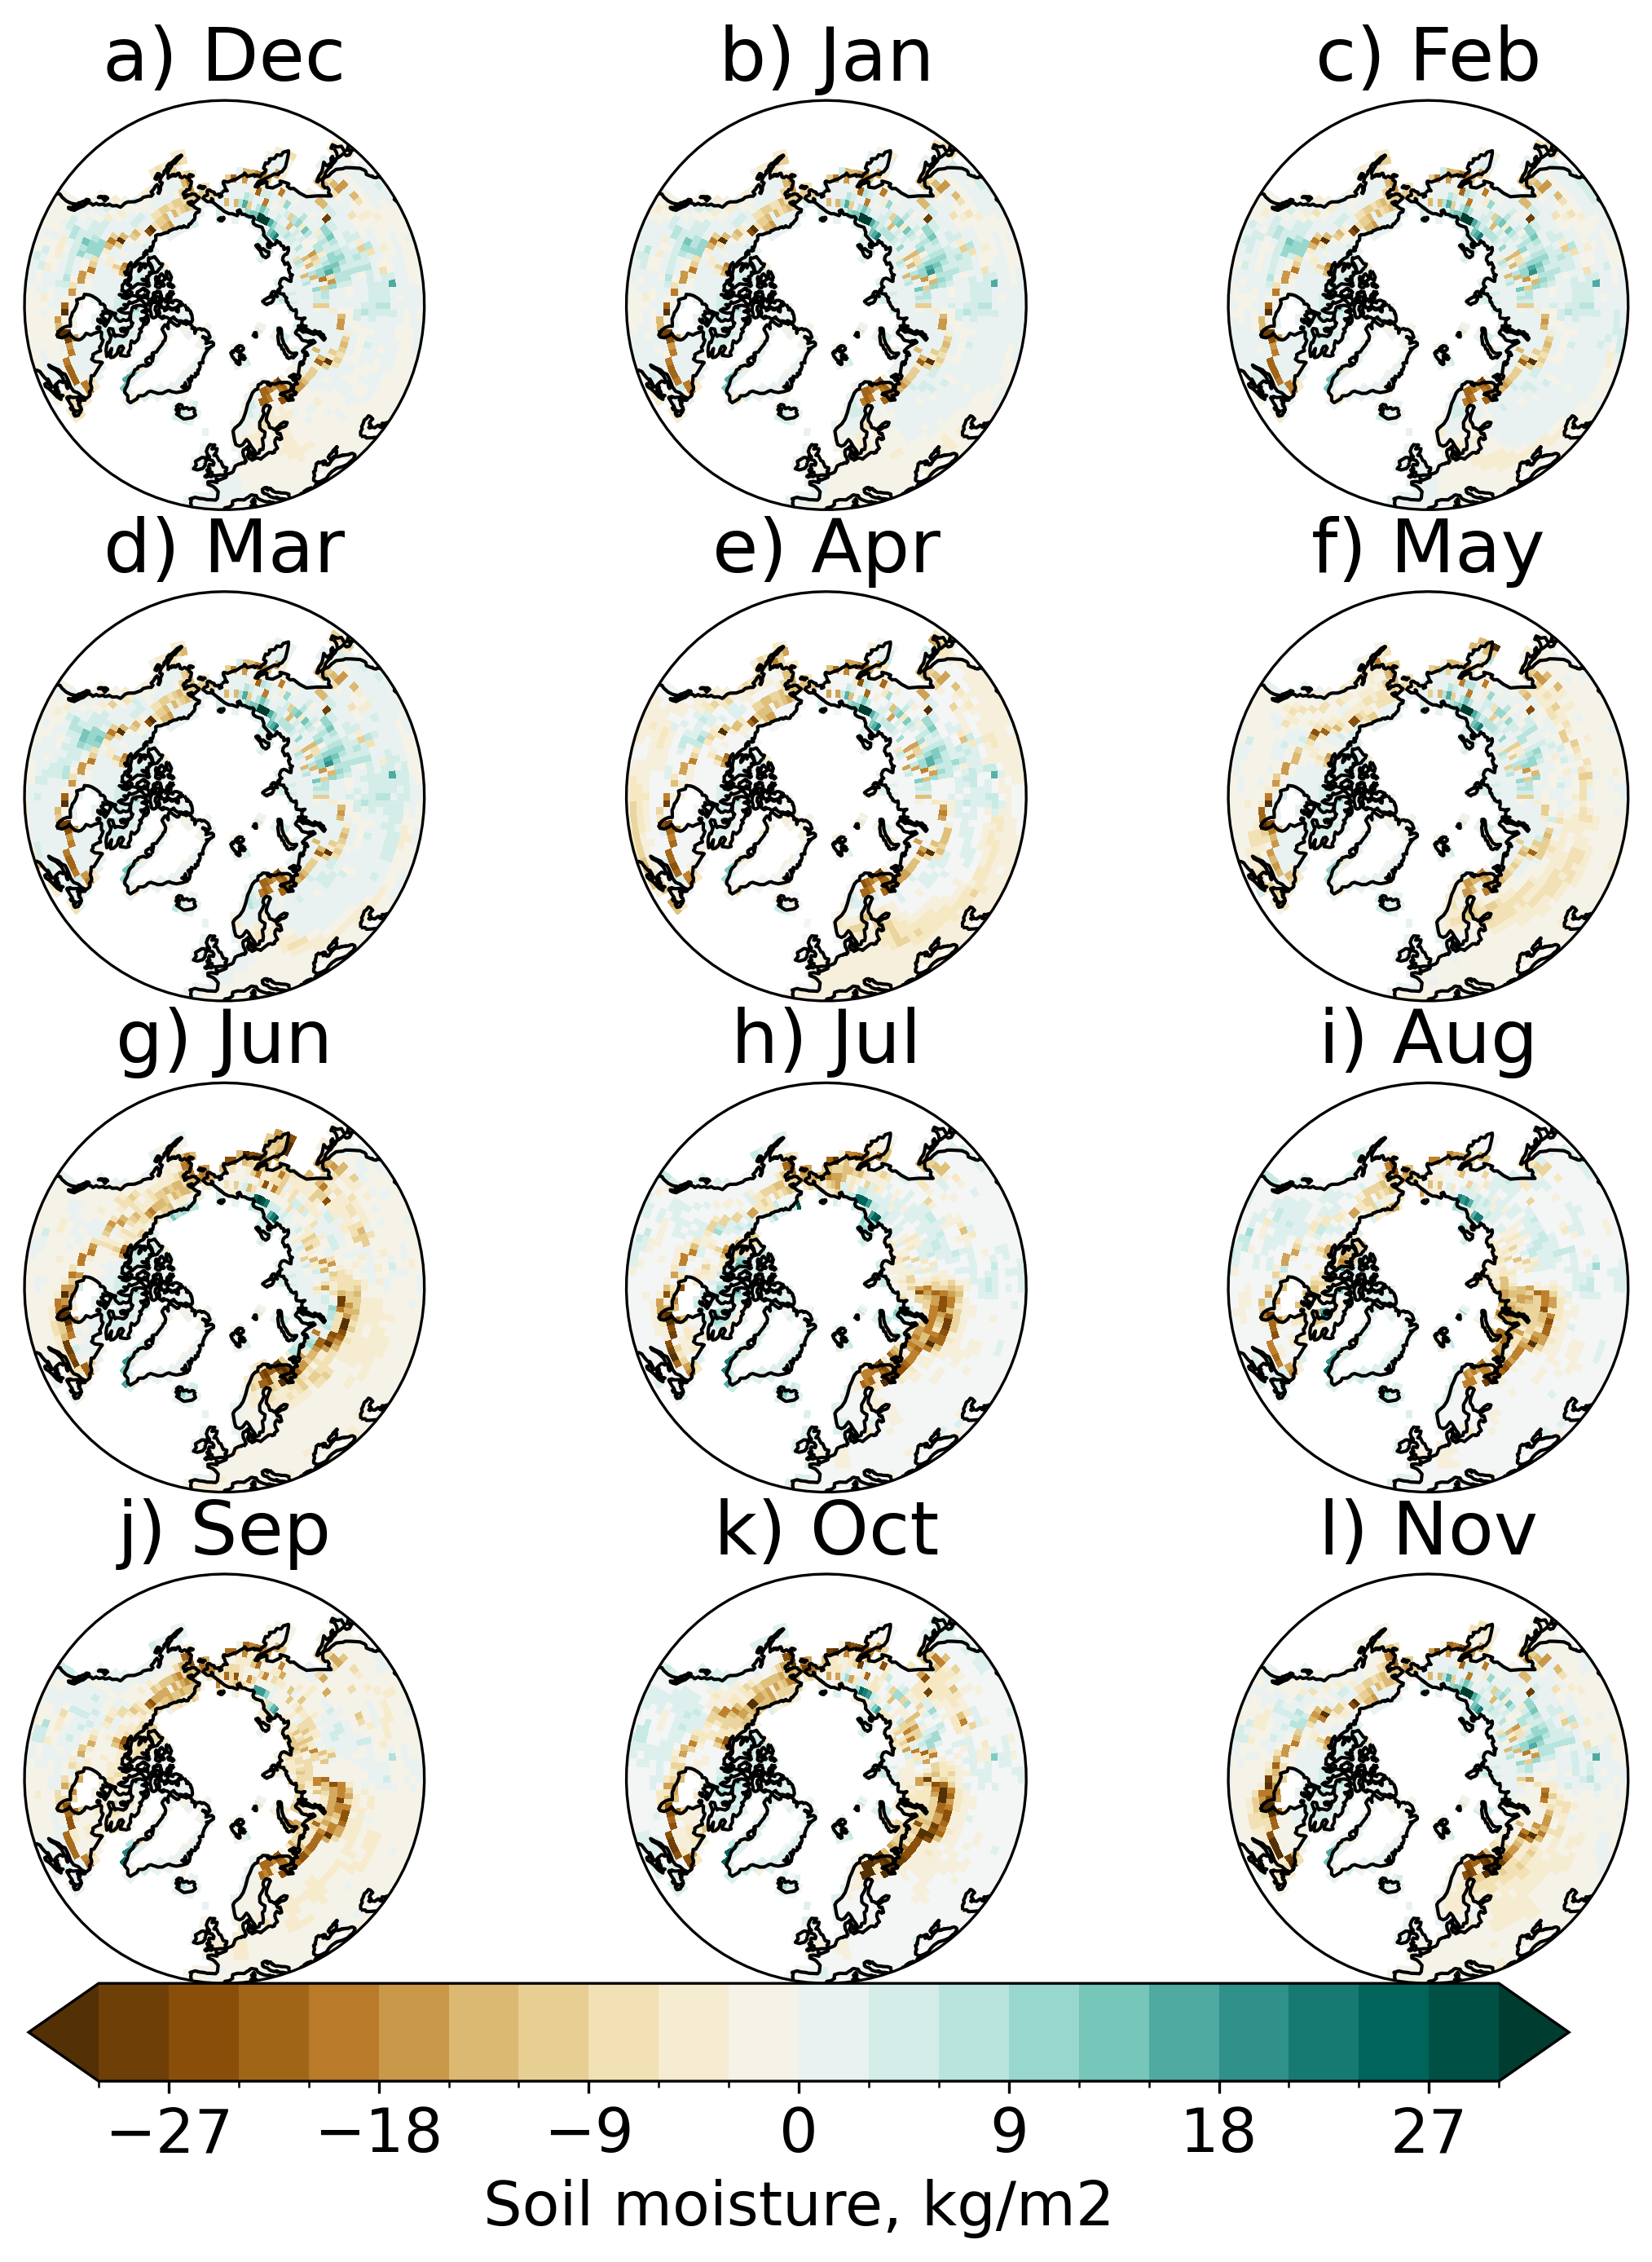

In [9]:
var = 'SOILWATER_10CM'
lim = 30
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

piClim_monthly = ds_piClim.sel(time=timeslice).groupby('time.month').mean('time')
ds_monthly = ds_2xCO2.sel(time=timeslice).groupby('time.month').mean('time')

# Set the projection to use for plotting
fig,axs = plt.subplots(nrows=4, ncols=3, figsize=[9,10],dpi=300,  subplot_kw={'projection':ccrs.Orthographic(0, 90)})

months = [[12, 1, 2], 
        [3, 4, 5], 
        [6, 7, 8], 
        [9, 10, 11]]

month_names = [['Dec', 'Jan', 'Feb'], 
        ['Mar', 'Apr', 'May'], 
        ['Jun', 'Jul', 'Aug'], 
        ['Sep', 'Oct', 'Nov']]

labels = [['a)', 'b)', 'c)'], 
        ['d)', 'e)', 'f)'], 
        ['g)', 'h)', 'i)'], 
        ['j)', 'k)', 'l)']]

for row in range(4):
    for col in range(3):
        ax = axs[row][col]
        month = months[row][col]
        piClim_i = piClim_monthly.sel(month=month)
        ds_i = ds_monthly.sel(month=month)

        functions.polarCentral_set_latlim([40,90], ax)
        data = ds_i[var] - piClim_i[var]
        #data = data/piClim_i[var]*100
        map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                                cmap='BrBG', levels=levels,
                                                add_colorbar=False)
        ax.set_title(labels[row][col]+' '+month_names[row][col], fontsize=22)        
        ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('Soil moisture, kg/m2', fontsize=18)
#cbar.ax.set_xlabel('Soil moisture, %', fontsize=18)


Text(0.5, 0, 'mm/day')

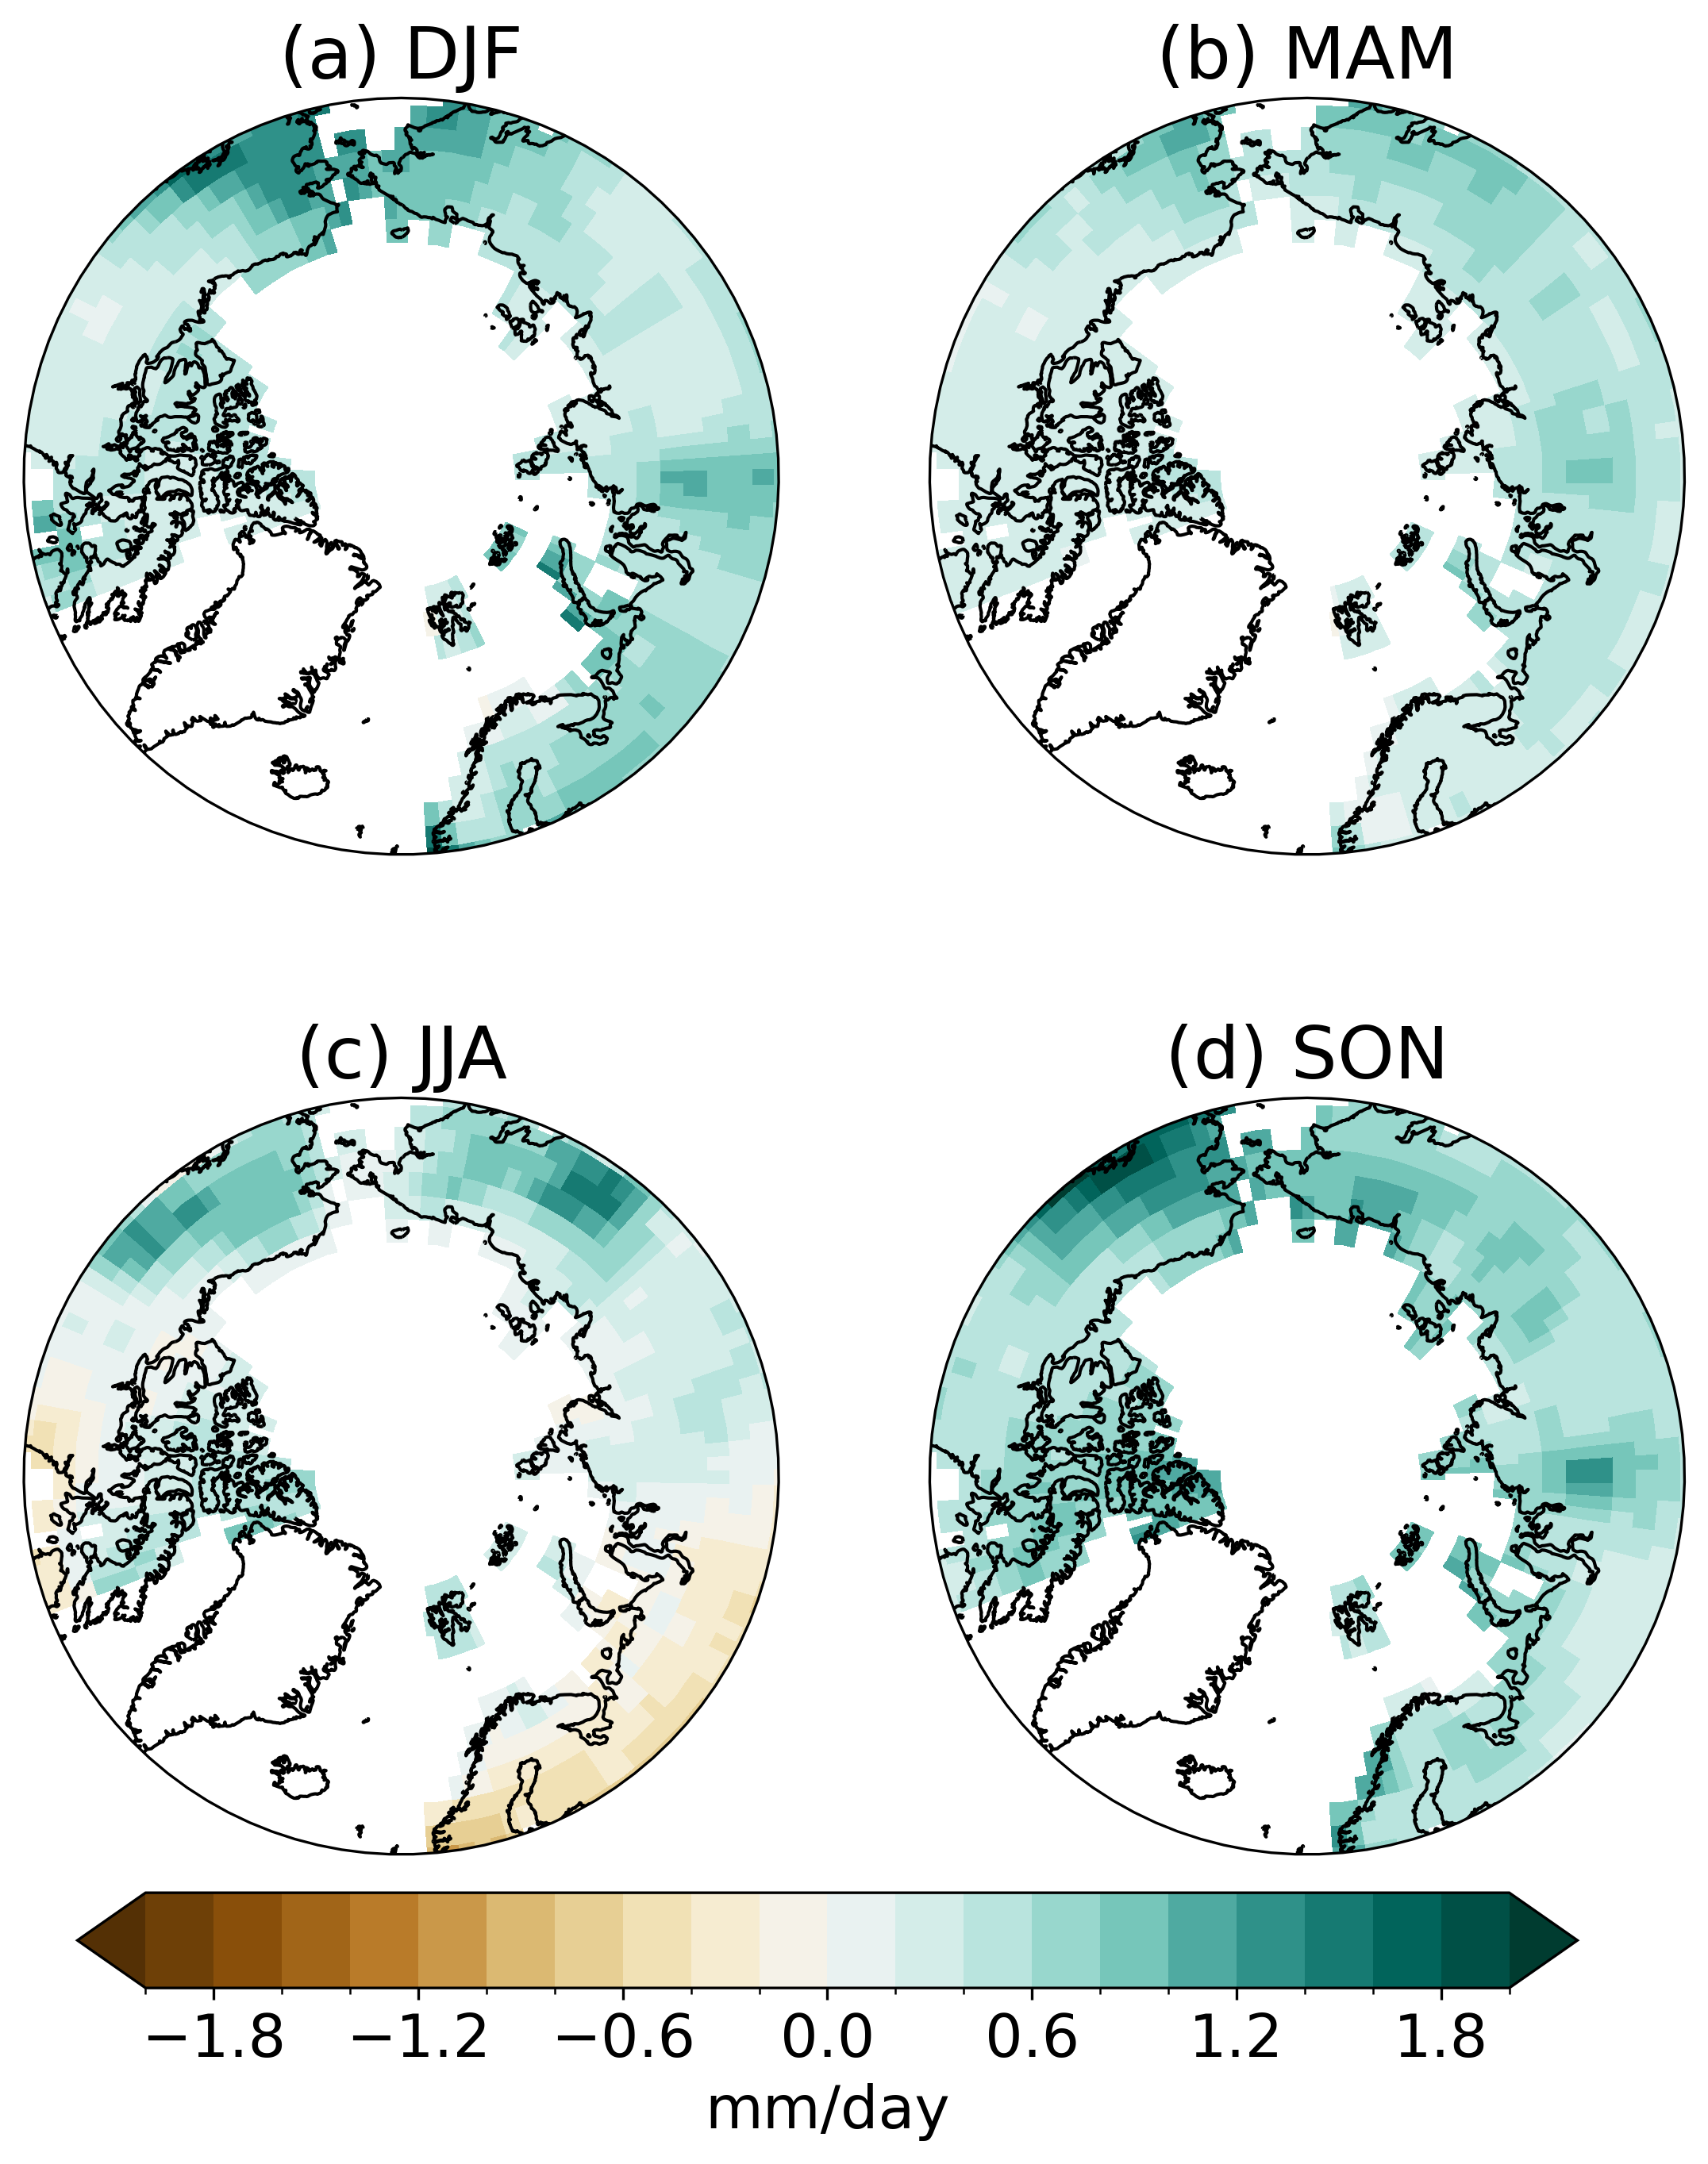

In [10]:
var = 'PRECIP_TOTAL'
lim = 2
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season, lon=slice(0,290)) - piClim_s[var].sel(season=season, lon=slice(0,290))
    data = data * 60 * 60 * 24
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('mm/day', fontsize=18)

Text(0.5, 0, 'mm/day')

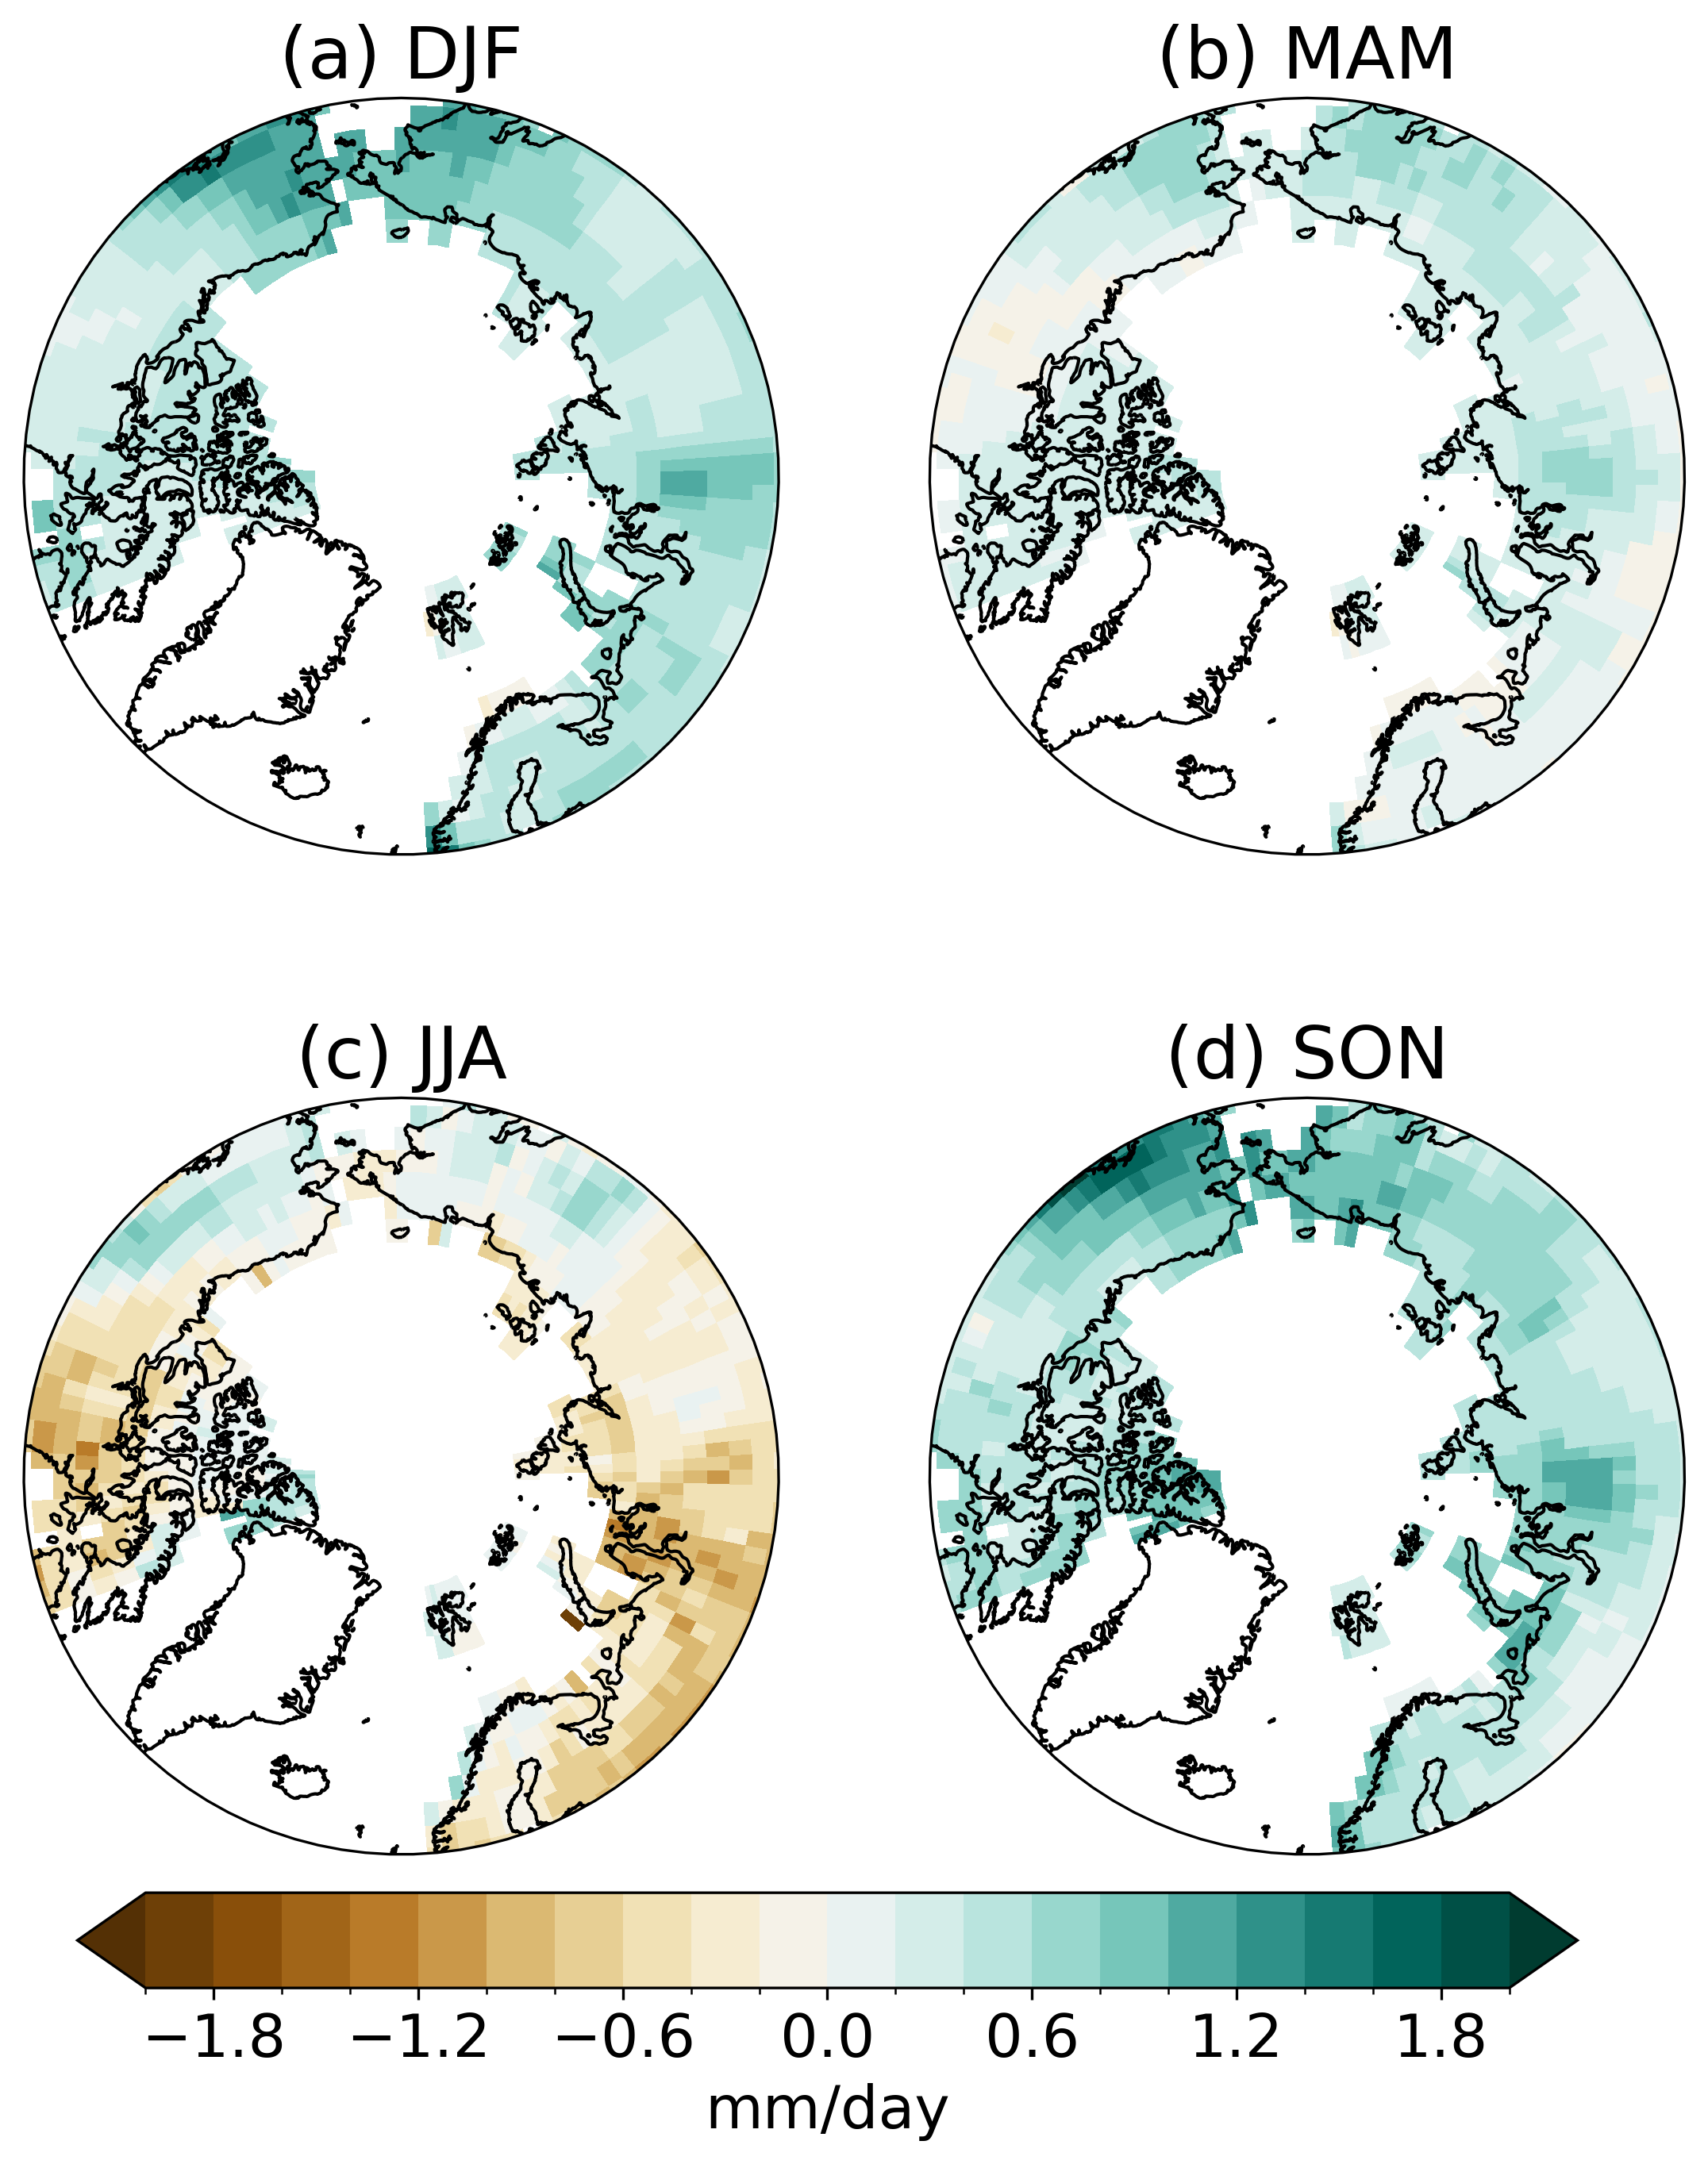

In [25]:
# Precipitation minus evapotranspiration
lim = 2
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
   # data = ds_s['PRECIP_TOTAL'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - ds_s['QRUNOFF'].sel(season=season)- (piClim_s['PRECIP_TOTAL'].sel(season=season) - piClim_s['QFLX_EVAP_TOT'].sel(season=season) - piClim_s['QRUNOFF'].sel(season=season))
    #data = ds_s['PRECIP_TOTAL'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - ds_s['QH2OSFC'].sel(season=season)- (piClim_s['PRECIP_TOTAL'].sel(season=season) - piClim_s['QFLX_EVAP_TOT'].sel(season=season) - piClim_s['QH2OSFC'].sel(season=season))
    data = ds_s['PRECIP_TOTAL'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - piClim_s['PRECIP_TOTAL'].sel(season=season) + piClim_s['QFLX_EVAP_TOT'].sel(season=season)
    #data = ds_s['QRUNOFF'].sel(season=season) - piClim_s['QRUNOFF'].sel(season=season)

    data = data.sel(lon=slice(0,290)) * 60 * 60 * 24
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('mm/day', fontsize=18)

/tmp/ipykernel_148918/3357160949.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


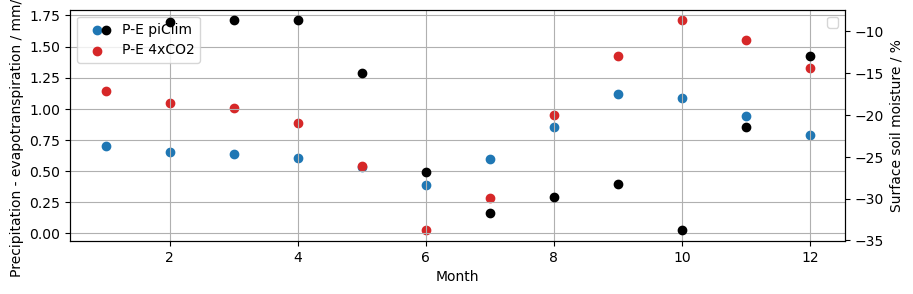

In [72]:
# HYDROLOGICAL BALANCE

# Make a spatial average
Arctic_lim = 60
season = 'JJA'
tslice = slice('2040-01-01','2069-12-31')

# Choose area (NB! EXCLUDING GREENLAND!)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(time=tslice,lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_2xCO2_i = ds_2xCO2.sel(time=tslice,lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_4xCO2_i = ds_4xCO2.sel(time=tslice,lat=slice(Arctic_lim,90), lon=slice(0,290))


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

fig,ax = plt.subplots(1, 1, figsize=(10,3))
for i in range(len(ds_piClim_i.month)):
    if i == 0:
        ax.scatter(1+i, ((ds_piClim_i['PRECIP_TOTAL'].isel(month=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:blue',label='P-E piClim')
        ax.scatter(1+i, ((ds_4xCO2_i['PRECIP_TOTAL'].isel(month=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:red',label='P-E 4xCO2')
    else:
        ax.scatter(1+i, ((ds_piClim_i['PRECIP_TOTAL'].isel(month=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:blue')
        ax.scatter(1+i, ((ds_4xCO2_i['PRECIP_TOTAL'].isel(month=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:red')

ax2 = ax.twinx()
for i in range(len(ds_piClim_i.month)):
    ax2.scatter(1+i, ((ds_4xCO2_i['SOILWATER_10CM'].isel(month=i) - ds_piClim_i['SOILWATER_10CM'].isel(month=i))*area_weights).sum()/((ds_piClim_i['SOILWATER_10CM'].isel(month=i)*area_weights).sum())*100, color='black')

ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation - evapotranspiration / mm/day')
ax2.set_ylabel('Surface soil moisture / %')
ax.legend()
ax2.legend()
plt.show()

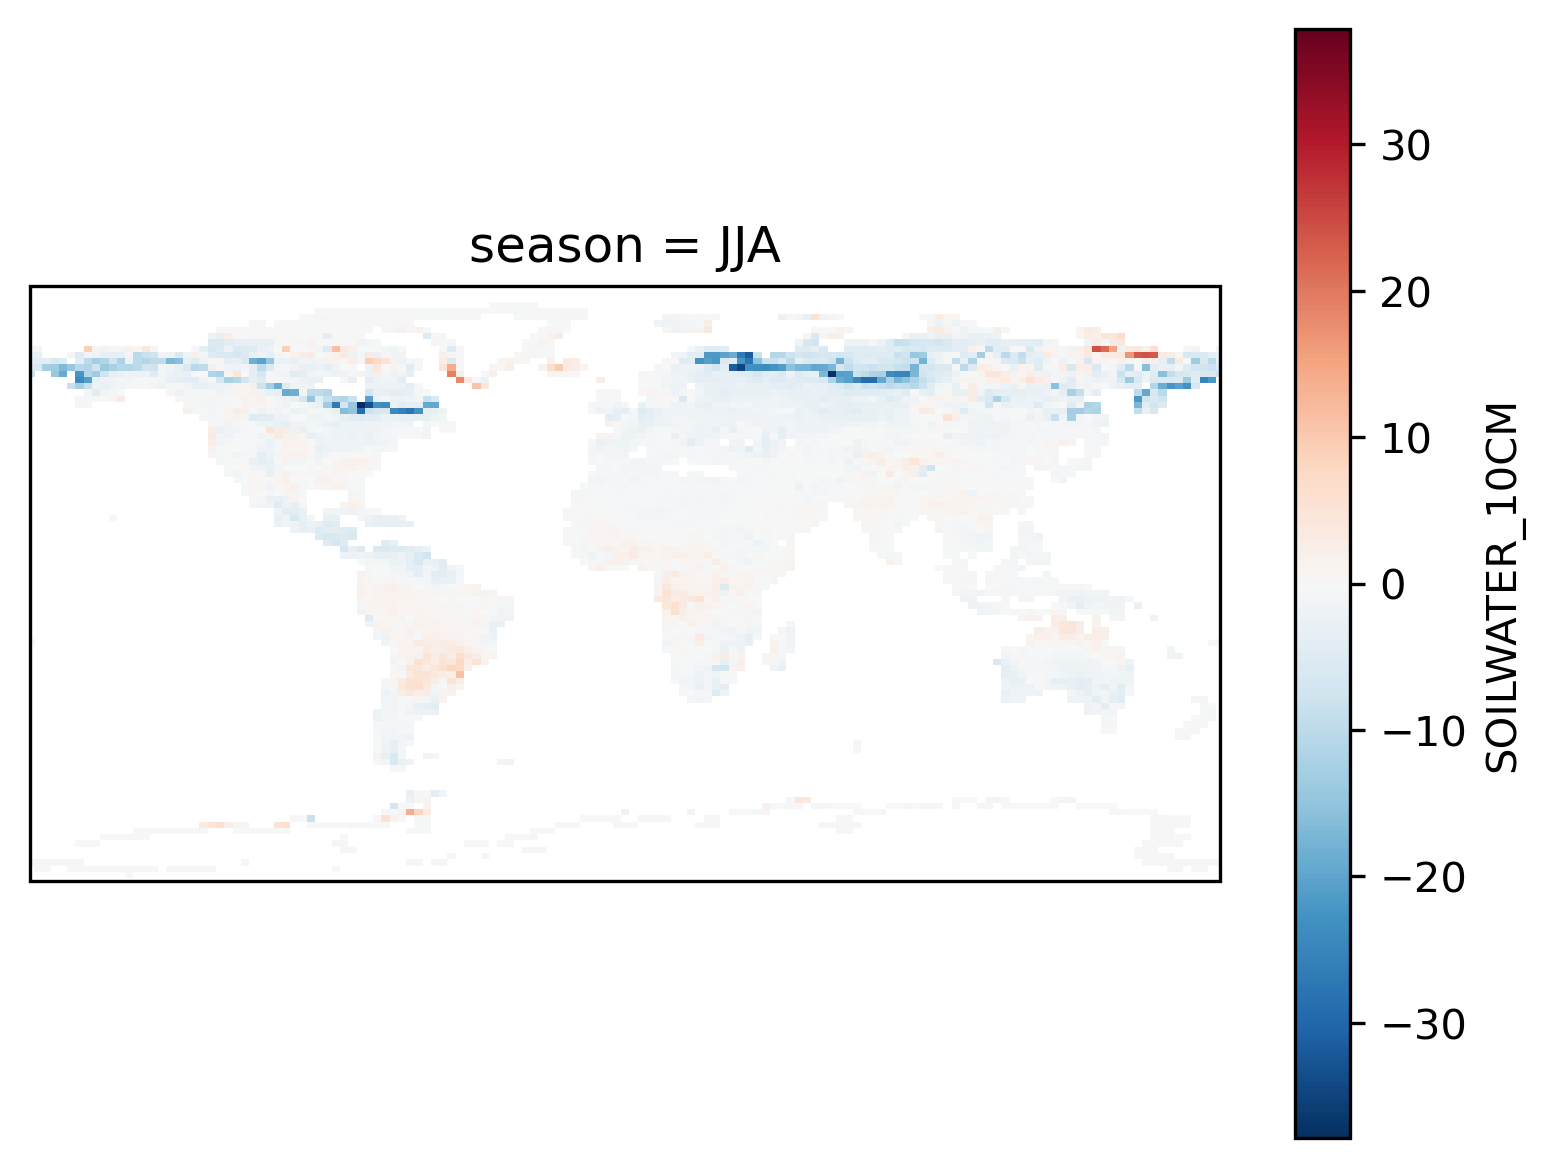

In [91]:
var = 'SOILWATER_10CM'
lim = 30
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_2xCO2.sel(time=timeslice).groupby('time.season').mean('time')

(ds_s[var].sel(season='JJA') - piClim_s[var].sel(season=season)).plot()

In [ ]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.evaptemp.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.evaptemp.clm2.concatfiles.nc')

In [33]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [31]:
tslice=slice('2040-01-01','2069-12-31')
season = 'JJA'
slice_piClim = ds_piClim_xtra.sel(time=tslice, lat=slice(0,90))
slice_4xCO2 = ds_4xCO2_xtra.sel(time=tslice, lat=slice(0,90))

slice_piClim = slice_piClim.sel(time=slice_piClim.time.dt.season==season)
slice_4xCO2 = slice_4xCO2.sel(time=slice_4xCO2.time.dt.season==season)

corr_matrix_piClim = np.ones((len(slice_piClim.lat), len(slice_piClim.lon)))*np.nan
corr_matrix_4xCO2 = np.ones((len(slice_piClim.lat), len(slice_piClim.lon)))*np.nan


for ilat in range(len(slice_piClim.lat)):
    for ilon in range(len(slice_piClim.lon)):
        corr_matrix_piClim[ilat, ilon] = xr.corr(slice_piClim['QFLX_EVAP_TOT'].isel(lat=ilat, lon=ilon), slice_piClim['TSA'].isel(lat=ilat, lon=ilon))
        corr_matrix_4xCO2[ilat, ilon] = xr.corr(slice_4xCO2['QFLX_EVAP_TOT'].isel(lat=ilat, lon=ilon), slice_4xCO2['TSA'].isel(lat=ilat, lon=ilon))

np.save('corr_matrix_piClim.npy', corr_matrix_piClim)
np.save('corr_matrix_4xCO2.npy', corr_matrix_4xCO2)

KeyboardInterrupt: 

In [ ]:
tslice=slice('2040-01-01','2069-12-31')
season = 'JJA'
slice_piClim = ds_piClim_xtra.sel(time=tslice, lat=slice(0,90))
slice_4xCO2 = ds_4xCO2_xtra.sel(time=tslice, lat=slice(0,90))

/projects/NS9600K/astridbg/conda/cloud-feedbacks_env/cloud-feedbacks/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/tmp/ipykernel_148918/3169844275.py:8: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 2700x3000 with 5 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(map, location='bottom', label='Correlation(ET,T)')


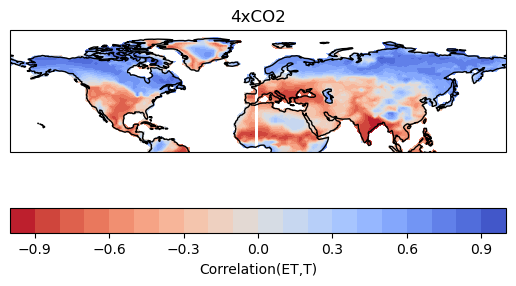

/projects/NS9600K/astridbg/conda/cloud-feedbacks_env/cloud-feedbacks/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/tmp/ipykernel_148918/3169844275.py:15: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 2700x3000 with 5 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(map, location='bottom', label='Correlation(ET,T)')


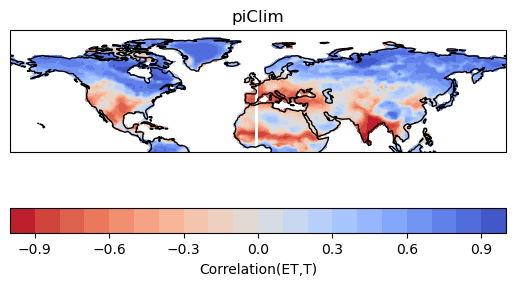

/projects/NS9600K/astridbg/conda/cloud-feedbacks_env/cloud-feedbacks/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/tmp/ipykernel_148918/3169844275.py:22: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 2700x3000 with 5 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(map, location='bottom', label='Correlation(ET,T)')


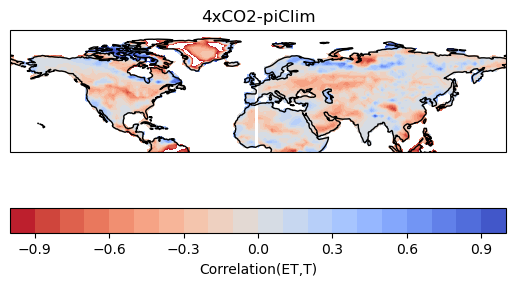

In [45]:
corr_matrix_piClim = np.load('corr_matrix_piClim.npy')
corr_matrix_4xCO2 = np.load('corr_matrix_4xCO2.npy')
X, Y = np.meshgrid(slice_piClim.lon, slice_piClim.lat)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('4xCO2')
map = ax.contourf(X,Y, corr_matrix_4xCO2, levels=np.linspace(-1, 1, 21), cmap='coolwarm_r', projection=ccrs.PlateCarree())
cbar = fig.colorbar(map, location='bottom', label='Correlation(ET,T)')
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('piClim')
map = ax.contourf(X,Y, corr_matrix_piClim, levels=np.linspace(-1, 1, 21), cmap='coolwarm_r', projection=ccrs.PlateCarree())
cbar = fig.colorbar(map, location='bottom', label='Correlation(ET,T)')
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('4xCO2-piClim')
map = ax.contourf(X,Y, corr_matrix_4xCO2-corr_matrix_piClim, levels=np.linspace(-1, 1, 21), cmap='coolwarm_r', projection=ccrs.PlateCarree())
cbar = fig.colorbar(map, location='bottom', label='Correlation(ET,T)')
ax.coastlines()
plt.show()
